In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. 사전준비

- 데이터 확인(데이터 불러오기)
- 결측치 대체/제거
- 이상치 대체/제거
- 스케일링

In [2]:
train_path = '/content/drive/MyDrive/머신러닝/data/sw_defect_train.csv'

In [3]:
df = pd.read_csv(train_path)

In [4]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
#데이터 프레임 셰입
df.shape

(101763, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [7]:
#1. 필요없는 열의 제거
train = df.drop(['id'], axis=1)

#2. 라벨인코딩 쓰지 않고, 정수로 바꾸는 방법
train['defects'] = train['defects'].replace([False, True], [0, 1])

In [8]:
train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [9]:
#스케일러
#StandardScaler -> 평균이 0, 표준편차
from sklearn.preprocessing import MinMaxScaler

#전체 데이터 프레임에서 X를 빼 옴
X = train.iloc[:, :-1]
y = train['defects']

In [12]:
scaler = MinMaxScaler()
scaler.fit(X)

feature = scaler.transform(X)
target = y

In [13]:
feature

array([[0.00610288, 0.00496278, 0.        , ..., 0.00701107, 0.00728236,
        0.00796813],
       [0.00377797, 0.00248139, 0.        , ..., 0.00332103, 0.00463423,
        0.00398406],
       [0.00290613, 0.00248139, 0.        , ..., 0.00516605, 0.00562728,
        0.00398406],
       ...,
       [0.00726533, 0.        , 0.        , ..., 0.00940959, 0.00926845,
        0.        ],
       [0.00261552, 0.00248139, 0.        , ..., 0.00442804, 0.00628931,
        0.00398406],
       [0.03923278, 0.04218362, 0.10365854, ..., 0.0298893 , 0.04468719,
        0.06772908]])

In [14]:
### 트레인-테스트 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(feature, target,
                     test_size=0.30,
                     stratify=y,
                     random_state=1)

In [15]:
len(X_train)

71234

## 모델링

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [17]:
xgb = XGBClassifier(random_state=0)

In [18]:
#훈련
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

## 검증과 평가

In [20]:
#훈련시킨 xgb 모델로 X_test 데이터를 predict
y_pred = xgb.predict(X_test)

test_acc = xgb.score(X_test, y_test)

print(f'테스트 정확도 : {test_acc:.3f}')

테스트 정확도 : 0.808


In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

recall = tp/(tp+fn)
print("민감도(재현율) :", recall)

#특이도
specitivity = tn/(tn+fp)
print("특이도 :", specitivity)

민감도(재현율) : 0.3783783783783784
특이도 : 0.9343922066920797


In [22]:
#ROC 커브 그려보기
from scipy import interp
from sklearn.metrics import roc_curve,auc

tprs = []
aucs = []

prediction = xgb.fit(X_train,y_train).predict_proba(X_test)
fpr, tpr, t = roc_curve(y_test, prediction[:, 1])

for i, v in zip(fpr, tpr):
  print(i, ":", 1-v, "=" , i+ (1-v))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0.33426514188903006 : 0.2488798959387195 = 0.5831450378277496
0.3346039813638289 : 0.2488798959387195 = 0.5834838773025484
0.33498517577297754 : 0.2488798959387195 = 0.5838650717116971
0.3353240152477764 : 0.2488798959387195 = 0.5842039111864958
0.3353240152477764 : 0.24873536638242522 = 0.5840593816302015
0.3355781448538755 : 0.24873536638242522 = 0.5843135112363007
0.3355781448538755 : 0.24859083682613092 = 0.5841689816800064
0.33600169419737397 : 0.24859083682613092 = 0.584592531023505
0.33600169419737397 : 0.24844630726983663 = 0.5844480014672107
0.33604404913172387 : 0.24844630726983663 = 0.5844903564015604
0.33604404913172387 : 0.24830177771354245 = 0.5843458268452664
0.3360864040660737 : 0.24830177771354245 = 0.5843881817796162
0.3360864040660737 : 0.24801271860095386 = 0.5840991226670276
0.336298178737823 : 0.24801271860095386 = 0.5843108973387768
0.336298178737823 : 0.24786818904465968 = 0.5841663677824827
0.33646759847522234 : 0.24786818904

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-23-270454e514aa>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


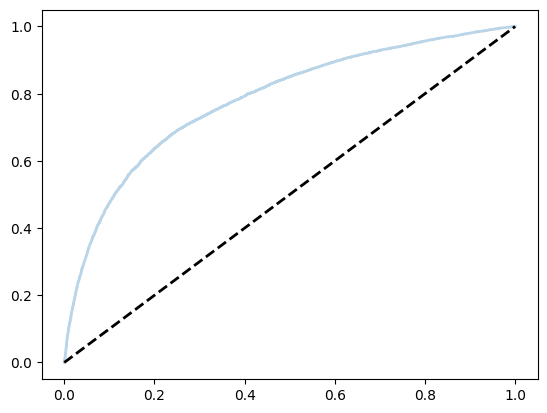

In [23]:
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

mean_fpr = np.linspace(0,1,100)
mean_tpr = np.mean(tprs, axis=0)

tprs.append(interp(mean_fpr, fpr, tpr))
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC curve for')
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')